In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import geopandas as gpd
from plotly.subplots import make_subplots
import plotly.express as px

df = pd.read_csv('coronavirus-covid-19-pandemic-worldwide-data.csv', sep=";")
df_france = pd.read_csv('donnees-hospitalieres-covid-19-dep-france.csv', sep=";")
df.Zone.unique()

array(['United Arab Emirates', 'United Kingdom', 'Spain', 'Sri Lanka',
       'Sudan', 'Summer Olympics 2020', 'Suriname', 'Sweden',
       'Switzerland', 'Syria', 'Taiwan*', 'Tajikistan', 'Tanzania',
       'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago',
       'Tunisia', 'Turkey', 'US', 'Uganda', 'Ukraine', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Winter Olympics 2022', 'Yemen', 'Zambia',
       'Zimbabwe', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia',
       'South Africa', 'South Sudan', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Korea, North', 'Korea, South', 'Kosovo', 'Kuwait', 'Kyrgyzstan',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Holy See', 'Hon

In [ ]:
df.head(5)

,Zone,Sub Zone,Category,Date,Count,Location
0,United Arab Emirates,NaN,Confirmed,2020-04-18,6302,"23.424076,53.847818"
1,United Arab Emirates,NaN,Confirmed,2020-05-23,28704,"23.424076,53.847818"
2,United Arab Emirates,NaN,Confirmed,2020-05-29,33170,"23.424076,53.847818"
3,United Arab Emirates,NaN,Confirmed,2020-06-17,43364,"23.424076,53.847818"
4,United Arab Emirates,NaN,Confirmed,2020-06-20,44533,"23.424076,53.847818"


In [ ]:
df.describe(include="all")

,Zone,Sub Zone,Category,Date,Count,Location
count,710640,212346,710640,710640,7.106400e+05,706410
unique,199,89,3,846,NaN,285
top,China,Hong Kong,Confirmed,2022-02-21,NaN,"0.0,0.0"
freq,86292,2538,241110,840,NaN,8460
mean,NaN,NaN,NaN,NaN,2.255682e+05,NaN
std,NaN,NaN,NaN,NaN,1.939713e+06,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,1.000000e+00,NaN
50%,NaN,NaN,NaN,NaN,3.870000e+02,NaN
75%,NaN,NaN,NaN,NaN,1.210400e+04,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710640 entries, 0 to 710639
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Zone      710640 non-null  object
 1   Sub Zone  212346 non-null  object
 2   Category  710640 non-null  object
 3   Date      710640 non-null  object
 4   Count     710640 non-null  int64 
 5   Location  706410 non-null  object
dtypes: int64(1), object(5)
memory usage: 32.5+ MB


In [ ]:
# Diviser le dataframe en deux parties pour créer deux tables (Avant vaccination et après)
# La campagne de vaccination démarre en France le 27 décembre 2020

df = df.sort_values(by=['Date'], ascending=True)
df.reset_index(drop=True, inplace=True)

# Retrouver le séparateur avant et après vaccination

sep_period = ((df.loc[df['Date'].str.contains('2020-12-27')].index).tolist())[0]

# before_covid_vax : avant la vaccination Covid
# after_covid_vax : après la vaccination Covid

before_covid_vax = df.head(sep_period)
after_covid_vax = df.tail((df.shape)[0] - sep_period)

In [ ]:
fig = px.line((before_covid_vax.loc[before_covid_vax['Zone'].str.contains('France') & before_covid_vax['Category'].str.contains('Deaths')]), x="Date", y="Count", color='Zone', title='Covid deaths')
fig.show()

In [ ]:
dff = df.dropna(subset=['Sub Zone'])
#dff = before_covid_vax
#dfff = (dff.loc[dff['Zone'].str.contains('France') & dff['Category'].str.contains('Deaths')])
dff = (dff.loc[dff['Zone'].str.contains('France') & dff['Category'].str.contains('Deaths')]).groupby('Date').sum()

#fig = px.line(dfff, x="Date", y="Count", color="Sub Zone", title='Covid deaths')
fig = px.line(dff, x=dff.index, y="Count", title='Covid deaths')
fig.show()

In [ ]:
input_1 = ''

In [ ]:
#before_covid_vax["Zone"].unique()
#(before_covid_vax.loc[before_covid_vax['Zone'].str.contains('France')]).groupby('Sub Zone').sum()

df_piv_france = df_france.pivot_table(values=["Nb Quotidien Décès"], index=["Date","Nom région"], aggfunc=np.sum)
df_piv_france.reset_index(level=0, inplace=True)
df_piv_france.reset_index(level=0, inplace=True)

fig = px.line(df_piv_france, x="Date", y="Nb Quotidien Décès", color='Nom région', title='Covid deaths')
fig.show()

In [2]:
# Trouver le nombre de mort quotidien mondial : 

def calculate_heb_death(day, prev_day):
    if pd.isna(prev_day) : return (int(day))

    else : return (int(day) - int(prev_day))


df_world_deaths = df.loc[df['Category'].str.contains('Deaths')]
df_world_deaths = df_world_deaths.pivot_table(values=["Count"], index=["Date"], aggfunc=np.sum)
df_world_deaths.reset_index(level=0, inplace=True)
df_world_deaths.reset_index(level=0, inplace=True)
df_world_deaths["Prev"] = df_world_deaths["Count"].shift()
df_world_deaths["Heb_deaths"] = df_world_deaths.apply(lambda x : calculate_heb_death(x["Count"], x["Prev"]), axis=1)

fig = px.line(df_world_deaths, x="Date", y="Heb_deaths", title='Covid deaths')
fig.show()

In [7]:
# Trouver le nombre de mort quotidien par pays : 

def calculate_heb_death(day, prev_day):
    if pd.isna(prev_day) : return (int(day))

    if (int(day) - int(prev_day)) < 0 : return (0)
    else : return (int(day) - int(prev_day))


def find_heb_death_zone(zone):
    res = df.loc[df['Zone'].str.contains(zone)]
    res = res.loc[res['Category'].str.contains('Confirmed')]
    res = res.pivot_table(values=["Count"], index=["Date"], aggfunc=np.sum)
    res.reset_index(level=0, inplace=True)
    res.reset_index(level=0, inplace=True)
    res["Prev"] = res["Count"].shift()
    res["Heb_deaths"] = res.apply(lambda x : calculate_heb_death(x["Count"], x["Prev"]), axis=1)
    fig = px.line(res, x="Date", y="Heb_deaths", title= zone + ' Covid deaths')
    fig.add_vline(x='2020-12-27', line_color="red")
    fig.show()
    #return(res)

#find_heb_death_zone("France")
all_zone = df.Zone.unique()

#for i in all_zone : find_heb_death_zone(i)

In [8]:
find_heb_death_zone("France")

after covid vaccination dans le monde 

In [ ]:
after_covid_vax.describe

<bound method NDFrame.describe of                 Zone                   Sub Zone   Category        Date  \
285600        Canada                        NaN  Recovered  2020-12-27   
285601        France  Saint Pierre and Miquelon     Deaths  2020-12-27   
285602        Kosovo                        NaN  Confirmed  2020-12-27   
285603         China                   Xinjiang  Recovered  2020-12-27   
285604  Burkina Faso                        NaN  Recovered  2020-12-27   
...              ...                        ...        ...         ...   
710635      Zimbabwe                        NaN     Deaths  2022-05-16   
710636        Turkey                        NaN  Confirmed  2022-05-16   
710637        Cyprus                        NaN     Deaths  2022-05-16   
710638         China             Inner Mongolia     Deaths  2022-05-16   
710639       Bahrain                        NaN  Recovered  2022-05-16   

           Count              Location  
285600    461134     56.1304,-106.34

In [ ]:
len(np.unique(after_covid_vax['Zone'])) # 199 pays 

199

<AxesSubplot: ylabel='Zone'>

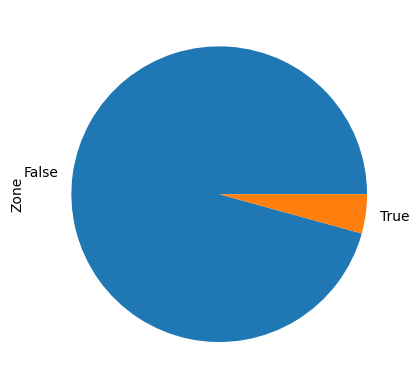

In [ ]:
after_covid_vax["Zone"].str.contains('France').value_counts(normalize=True).plot(kind='pie')

In [ ]:
after_covid_vax


,Zone,Sub Zone,Category,Date,Count,Location
285600,Canada,NaN,Recovered,2020-12-27,461134,"56.1304,-106.3468"
285601,France,Saint Pierre and Miquelon,Deaths,2020-12-27,0,"46.8852,-56.3159"
285602,Kosovo,NaN,Confirmed,2020-12-27,50620,"42.602636,20.902977"
285603,China,Xinjiang,Recovered,2020-12-27,977,"41.1129,85.2401"
285604,Burkina Faso,NaN,Recovered,2020-12-27,4775,"12.2383,-1.5616"
...,...,...,...,...,...,...
710635,Zimbabwe,NaN,Deaths,2022-05-16,5484,"-19.015438,29.154857"
710636,Turkey,NaN,Confirmed,2022-05-16,15055576,"38.9637,35.2433"
710637,Cyprus,NaN,Deaths,2022-05-16,1051,"35.1264,33.4299"
710638,China,Inner Mongolia,Deaths,2022-05-16,1,"44.0935,113.9448"


In [ ]:
DeepnoteChart(after_covid_vax, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"sort":null,"type":"nominal","field":"Zone","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"Count","scale":{"type":"linear"},"aggregate":"sum"}}}""")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=666f9cde-bfa6-456b-bd69-f733c8462ed9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>